---
# Title: *Image processing with numpy and scipy*
---

Import modules:

In [1]:
import numpy as np
import scipy
#from scipy import stats
from matplotlib import pyplot as plt
from PIL import Image

## Exercises for indexing arrays numpy

Create a 2-dimensional array: 3 rows, 6 columns:
  > function np.arange(start, stop, step) - step=1 default
   
### Selecting array elements by specifying indexes:
   
   - selection principle:
     - first, indexes of rows are given, then indexes of columns
     - indexes are given by: [start, stop, step, start, stop, step]
   - examples of row and column selection:

In [2]:
x = np.arange(3*6).reshape(3,6)
x

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17]])

In [3]:
# select all rows (':' character) and all columns (':' character)
print(x[:,:],'\n')

# select 1 row (index 0) and all columns (the sign ':')
print(x[0,:],'\n')

#select the last two rows and the last two columns
print(x[1:,4:],'\n')

# or
print(x[-2:,-2:],'\n')

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]] 

[0 1 2 3 4 5] 

[[10 11]
 [16 17]] 

[[10 11]
 [16 17]] 



In [4]:
# select every second row and every third column
print(x[0:3:2,0:6:3],'\n') 

# or
print(x[::2,::3],'\n') 

[[ 0  3]
 [12 15]] 

[[ 0  3]
 [12 15]] 



### Selecting items by logical conditions

In [5]:
s ='select items larger than 10'
print(s,x[x>10],'\n',sep='\n')

s = 'select items larger than 8 and smaller than 15'
print(s,x[(x>8) & (x<15)],sep='\n')

select items larger than 10
[11 12 13 14 15 16 17]


select items larger than 8 and smaller than 15
[ 9 10 11 12 13 14]


### Assigning new values to array cells selected based on a logical condition

**f'text {}'**: displayed by the print() text function, it is formatted using f-string', see here: [zetcode](http://zetcode.com/python/fstring/)

In [6]:
s1 = 'Replace less than 6 with 99'
x1 = x.copy()
x1[x<6] = 99

s2 = 'Replace larger than 9 and smaller than 15 with 1000'
x2 = x.copy()
x2[(x2>9) & (x2<15)] = 100

print(f'oryginal:\n{x}\n\n{s1}:\n{x1}\n\n{s2}\n{x2}')

oryginal:
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]]

Replace less than 6 with 99:
[[99 99 99 99 99 99]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]]

Replace larger than 9 and smaller than 15 with 1000
[[  0   1   2   3   4   5]
 [  6   7   8   9 100 100]
 [100 100 100  15  16  17]]


## Image loading

>If the notebook file was created in the image directory then access to the image files is done by entering the file name - no need to enter the full address

In [51]:
# %pwd - magic command - checks the current working directory
curDir = %pwd
print(f'{curDir}')

/home/u1/22_dydaktyka/05imProc


In [53]:
ad = './img_test/lena_gray_512.tif' # '.' means the current directory, i.e. here 'standard_test_images'
imLena = Image.open(ad)
print(f'\nWhat object is "im": {type(imLena)}')

# convert the im object to the numpy array
arLena = np.array(imLena)
print(f'\nnumpy array:\n{"typ":>28}:\t{type(arLena)}\n{"shape":>28}:\t{arLena.shape}')
print(f'data type of the numpy array:\t{arLena.dtype}')


What object is "im": <class 'PIL.TiffImagePlugin.TiffImageFile'>

numpy array:
                         typ:	<class 'numpy.ndarray'>
                       shape:	(512, 512)
data type of the numpy array:	uint8


## Show pictures: im and ar

- plt.gray(): sets the display mode in gray colors
- enumerate(): built-in function of Python, gives automatic counter. See: [enumerate](https://docs.python.org/3.7/library/functions.html#enumerate)
- plt.subplot(): creates a grid of charts: number of columns, number of rows, image number.
- plt.imshow(): displays the image
- plt.title(): displays the image title

<Figure size 432x288 with 0 Axes>

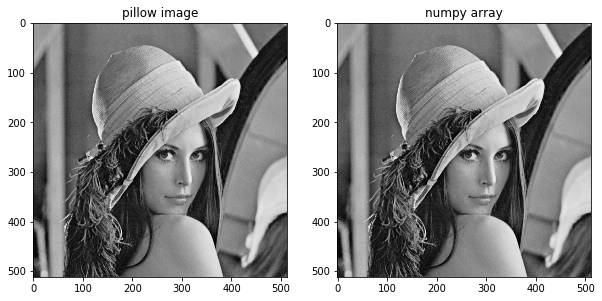

In [8]:
# list of image titles
tit = ['pillow image','numpy array']
plt.gray()
f = plt.figure(figsize=(10,5))
for i,img in enumerate([imLena,arLena],1):
    plt.subplot(1,2,i)  # 2 images: one row, two columns
    plt.imshow(img)
    plt.title(tit[i-1])
del img

# Function to calculate the image size

Setting the dimensions of the image:
- plt.figure() method with the argument 'figsize': plt.figure(figsize = (8,6))
- dimensions are a tupla of numbers: (width, hight) in inches

Relationship between the array dimension and the image dimension:
- the image size depends on the size of the array (number of rows, number of columns)
- array pixels / cells are square and dimensionless
- the size depends on how many pixels (columns, rows) per unit of length (1 inch) are - this parameter is dpi
- the larger the dpi, the smaller the image and vice versa:

$$ \begin{align}
width =~& number~of~columns * 1/dpi\\
hight =~& number~of~rows * 1/dpi
\end{align}$$

In [9]:
def mySize(arrList,dpi = 100):
    ''' Only up to 6 images, 3 images per row.
        Args:
            - arrList:   list of numpy arrays
            - dpi:       piksel for inch
    '''
    dpi = 1/dpi
    h = max([x.shape[0] for x in arrList])
    w = max([x.shape[1] for x in arrList])
    l = len(arrList)
    if l == 1:
        height = h
        width = w
    elif l <= 3:
        height = h
        width = w * l
    elif l > 3 and l < 7:
        height = h * 2
        width = w * 3
    return int(width * dpi), int(height * dpi)

In [10]:
print(mySize([arLena],dpi=75))

(6, 6)


# Playing with a histogram

## Image histogram

- plt.hist(): calculates and displays a histogram for a 1-dimensional data vector
- ar.ravel(): converts a 2-dimensional array to a 1-dimensional vector
- bins: number of histogram intervals

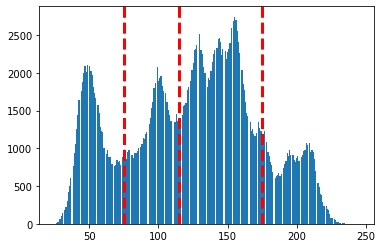

In [11]:
plt.hist(arLena.ravel(),bins=256);
for l in [75,115,175]:
    plt.axvline(l,c='r',ls='--',lw=3) # adds a single vertical line at 'l' position

## Histogram thresholding
Simple, manual threshold setting in the histogram and division into classes:
  - division into 4 classes: 1,2,3,4
  - threshold values: 0-75, 75-115, 115-175, 175-255

In [12]:
# class
#cl = list(range(1,5))
cl = (1,2)
# ranges
r = [(0,50), (50,255)]
#r = [(0,70), (70,115), (115,180), (180,255)]
for i, c in enumerate(cl):
    print(f'class: {c}, range: {r[i]}')

class: 1, range: (0, 50)
class: 2, range: (50, 255)


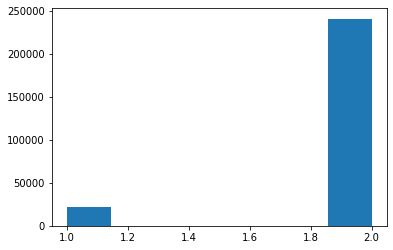

In [13]:
# assigning class values to the image
ar1 = arLena.copy()

r1 = r[0]
ar1[(arLena>=r1[0]) & (arLena<r1[1])] = cl[0]

r2 = r[1]
ar1[(arLena>=r2[0]) & (arLena<r2[1])] = cl[1]

#r3 = r[2]
#ar1[(arLena>=r3[0]) & (arLena<r3[1])] = cl[2]

#r4 = r[3]
#ar1[(arLena>=r4[0]) & (arLena<r4[1])] = cl[3]

plt.hist(ar1.ravel(), bins =7);

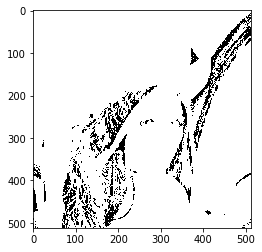

In [14]:
plt.imshow(ar1);

In [15]:
print(np.unique(ar1))
del ar1

[1 2]


## OTSU’S METHOD FOR IMAGE THESHOLDING

The digital image has pixels with different values associated with different objects. The distribution of pixel values is characterized by the mean value $\mu$ and variance $\sigma^2$.


The method is based on the assumption that there are two separating groups of pixel values (classes) in the image: for background and for xxx. The algorithm looks for a place on the histogram in which the division can occur.
Each class has its own distribution of pixel values. The place of division is a place for which:
- the sum of variances within groups ($\sigma_w^2$) is minimal

or
- variance between groups ($\sigma_p$) is maximum

### A simple example

To approximate the variance calculations, a simulation will be made for a one-dimensional data vector, arbitrarily divided into two classes:

In [16]:
np.random.seed(555) # setting the generator kernel to get the same sampling results
vek = np.sort(np.random.randint(1,6,12)) #one-dimensional data vector
# division into two classes: cl1, cl2
cl1 = vek[:4]
cl2 = vek[4:]
print(f'data vektor: {vek}\n{"class_1:":>12} {cl1}\n{"class_2:":>12} {cl2}')

data vektor: [1 1 2 2 2 3 3 3 4 5 5 5]
    class_1: [1 1 2 2]
    class_2: [2 3 3 3 4 5 5 5]


1. Total(general) variance $\sigma^2$ is equal to the sum of the intra-group $\sigma_w^2$ and inter-group variances (between groups) $\sigma_p^2$:
    >$$\sigma^2 = \sigma_w^2 + \sigma_p^2 = \frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N-1} $$where:
   - $N$: number of data vector elements, $N=12$ in this example
   - $x_i$: i-th element of the data vector
   - $ \mu $: total(general) mean value - $\mu = \frac{\sum_{i=1}^{N} x_i}{N}$


2. Intra-group variance $\sigma_w^2$:
    >$$ \sigma_w^2 = \sum_{j=1}^K w_j \cdot \sigma_j^2$$
    >where:
     - $K$: number of classes, $K=2$ in this example
     - $j$: class index $j: \{1,...K\}$, here $j: \{1,2\}$
     - $N_j$: class number 'j', $N_1=4$ and $N_2 = 8$ in this example 
     - $w_j$: weight, $$w_j = \frac{N_j}{N}$$
     - $ \mu_j $ - mean value in group 'j' $\mu_j = \frac{\sum_{i=1}^{N_j} x_i}{N_j}$
     - $\sigma_j^2$: variance for the class 'j'
     $$\sigma_{j}^2 = \frac{\sum_{i=1}^{N_j} (x_i - \mu_j)^2}{N_j-1}$$   


3. Inter-group variances (between groups) $\sigma_p^2$:
   >$$\sigma_p^2 = \frac{\sum_{j=1}^{K} w_j \cdot (\mu_j - \mu)^2}{K-1}$$where:
   >- $\mu$: total(general) mean value

---
---

4. Step by step:
   - resaults:
    > - number of items: $N = 12$, $N_1=4$, $N_2=8$
    > - mean values: $\mu = 3$, $\mu_1 = 1.5$, $\mu_2 = 3.75$
    > - variances (total and for each class): $\sigma^2 = 2$, $\sigma_1^2 = 0.25$, $\sigma_2^2 = 1.1875$
    > - intra-group variance $ \sigma_w^2 = 0.875$
    > - inter-group variances (between groups) $ \sigma_p^2 = 0.125$
    
  - intra-group variance:
    >$$ \sigma_w^2 = \frac{N_1}{N} \cdot \sigma_1^2 + \frac{N_2}{N} \cdot \sigma_2^2$$
  - inter-group variances (between groups):
    > $$\sigma_p^2 = \frac{(N_1/N) \cdot (\mu_1 - \mu)^2 + (N_2/N) \cdot (\mu_2 - \mu)^2}{K-1}$$
  - examples of calculations:
    > example of calculating the variance in class 1:
    >$$ \sigma_1^2 = \frac{(1-1.5)^2 +(1-1.5)^2 +(2-1.5)^2 +(2-1.5)^2}{8} $$
    > calculation of intra-group variance:
    >$$ \sigma_w^2 = \frac{4}{12} \cdot 0.25 + \frac{8}{12} \cdot 1.1875 = 0.875$$
    > calculation of inter-group variance (between groups)
    >$$\sigma_p^2 = \frac{(4/12) \cdot (1.5 - 3)^2 + (8/12) \cdot (3.75 - 3)^2}{2-1} = 1.125$$

5. In the Otsu method, calculations are iterative for each pixel value. Division into classes occurs for the value for which the inter-group variance (between groups) is the largest.

In [17]:
# indent line
i=25
#number of items:
N,N1,N2 = vek.size,cl1.size,cl2.size
print(f'{"number of items:":>{i}} N={N},  N1={N1},  N2={N2}\n')

# mean values
mu,mu1,mu2 = vek.mean(), cl1.mean(), cl2.mean()
print(f'{"mean values:":>{i}} mu={mu},  mu1={mu1},  mu2={mu2}\n')

#variances (total and for each class)
sigma,sigma1,sigma2 = vek.var(),cl1.var(),cl2.var()
print(f'{"variances:":>{i}} sigma={sigma},  sigma1={sigma1},  sigma2={sigma2}\n')

# variances: intra-group and inter-group
sigma_w = (4/12)*0.25 + (8/12) * 1.1875
sigma_p = (4/12) *(1.5 - 3)**2 + (8/12)*(3.75 - 3)**2
print(f'{"variances (intra,inter):":>{i}} sigma_w={sigma_w},  sigma_p={sigma_p}\n')

# Checking if the sum of the intra and inter variances equals the total variance
print(100*'-')
print(f'Checking if:\n{"sigma = sigma_w + sigma_p:":>{i}}\
\t{sigma} = {sigma_w} + {sigma_p} = {sigma_w+sigma_p}\n')

         number of items: N=12,  N1=4,  N2=8

             mean values: mu=3.0,  mu1=1.5,  mu2=3.75

               variances: sigma=2.0,  sigma1=0.25,  sigma2=1.1875

 variances (intra,inter): sigma_w=0.875,  sigma_p=1.125

----------------------------------------------------------------------------------------------------
Checking if:
sigma = sigma_w + sigma_p:	2.0 = 0.875 + 1.125 = 2.0



### Simple implementation of the Otsu method

In [18]:
def myOtsu(ar):
    ar = ar.copy()
    ar = ar.ravel() # converts 2D arrays to 1 dimensional data vector
    mu = ar.mean()    # total mean value
    N = ar.size
    K = 2
    pixelVal = np.arange(256)
    threshold =[0,0] # collects two values: [sigma, threshold]
    
    # data to the graph as variance changes
    tt = [] # collects threshold values
    sg =[]  # collects variances
   
    for t in pixelVal: 
        cl1 = ar[(ar < t)]
        cl2 = ar[ar >= t]
        
        #if any class has zero elements - skip this threshold
        if cl1.size ==0 or cl2.size == 0:
            continue
        
        N1,N2 = cl1.size, cl2.size
        w1,w2 = N1/N, N2/N  # calculate weight
        mu1,mu2 = cl1.mean(), cl2.mean()
        
        sigma_p = (w1*(mu1-mu)**2 + w2*(mu2-mu)**2)/(K-1)
        sigma_p = np.round(sigma_p,0)
              
        tt.append(t)
        sg.append(int(sigma_p))
        
        # it starts with the value threshold[0] = 0
        if sigma_p > threshold[0]:
            threshold[0]= sigma_p
            threshold[1] = t  
    del ar

    return (tt,sg,threshold)

In [19]:
tt,sg,threshold = myOtsu(arLena)
print(f'Result of threshold[sigma_p,t]:   {threshold}')

arOtsu = arLena.copy()
# assign new values in the image
tr = threshold[1]
arOtsu[arLena<=tr] = 0
arOtsu[arLena>tr] = 255

Result of threshold[sigma_p,t]:   [1601.0, 116]


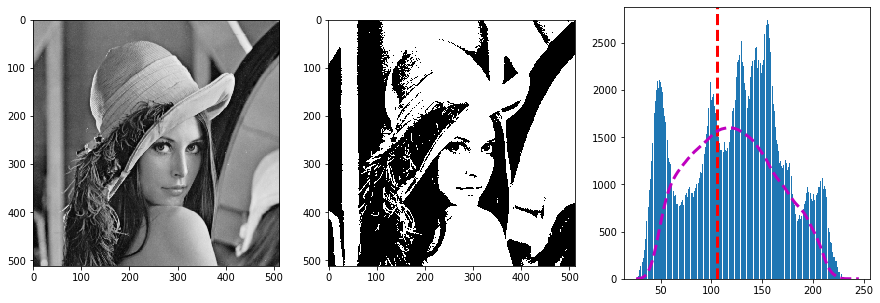

In [50]:
w,h = mySize([arLena,arLena,arLena],dpi=100)
f = plt.figure(figsize=(w,h))

for i,img in enumerate([arLena,arOtsu,'hi'],1):
    plt.subplot(1,3,i)
    if i in [1,2]:
        plt.imshow(img)
    elif i == 3:
        plt.hist(arLena.ravel(),bins=256)
        plt.axvline(tr,c='r',ls='--',lw=3) # selected division threshold
        plt.plot(tt,sg,c='m',ls='--',lw=3) # variance as a function of threshold value
        

        
    
#plt.plot(tt,sg)

In [21]:


ar2 = arLena.copy()
freq,bins = np.histogram(ar2.ravel(),bins=256)
N = ar2.size
pixelVal = np.arange(256)


In [22]:
threshold =[0,0]
tt1,sg1 = [],[]
for t in range(2,256-2):
    #print(f'\nt: {t}\n\n')
    # division into classes
    class1 = freq[:t]
    class2 = freq[t:]
    
    #calculate the sum of pixel frequencies in classes
    sf_1 = np.sum(class1)
    sf_2 = np.sum(class2)
    
    # calculate w element of variance within classes
    w1 = sf_1 / N
    w2 = sf_2/ N
    
    # calculate the weighted average of pixel frequencies in classes
    mu_1 = np.sum((class1 * pixelVal[:t])) / sf_1
    mu_2 = np.sum((class2 * pixelVal[t:])) / sf_2
       
    sigma = w1 * w2 *(mu_1 - mu_2)**2
    tt1.append(t)
    sg1.append(int(sigma))
    if sigma > threshold[0]:
        threshold[0]= sigma
        threshold[1] = t

print(f'threshold: {threshold}')

threshold: [2168.9697130820614, 106]


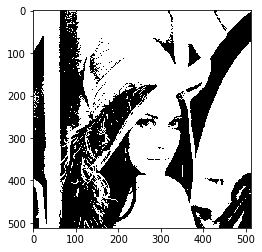

In [23]:
tr = threshold[1]
ar2[ar2<=tr] = 0
ar2[ar2>tr] = 255
plt.imshow(ar2);

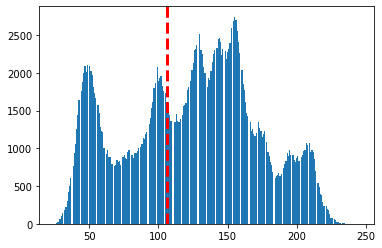

In [24]:
plt.hist(arLena.ravel(),bins=256);
plt.axvline(tr,c='r',ls='--',lw=3)

## Histogram stretching

Aim: to change the contrast of the image

Method: linear histogram stretching

Contrast: the difference between the maximum and minimum image value

Equation: $ y = ax + b $, where:

   - x: curren image values
   - y: new image values
   - a, b: transformation coefficients 

In [25]:
# new image
imMan = Image.open('./img_test/cameraman.tif')
arMan = np.array(imMan)

w,h = mySize([arMan,arMan,arMan])


# transformation coefficients: point 1: (5,0), point 2: (245,255)
a,b = np.polyfit([5,190],[0,255],1)
print(f'Transformation coefficients:\n{"a:":>15} {a}, b: {b}\n')
x = np.unique(arMan.ravel())
y = a*x + b

ar2 = arMan * a + b
ar2[ar2<0] = 0
ar2[ar2>255] = 255
ar2 = np.array(ar2,dtype=np.uint8)



Transformation coefficients:
             a: 1.378378378378379, b: -6.891891891891848



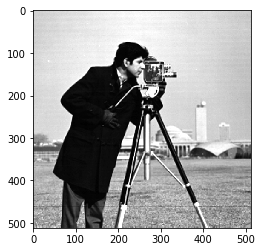

In [26]:
plt.imshow(ar2)

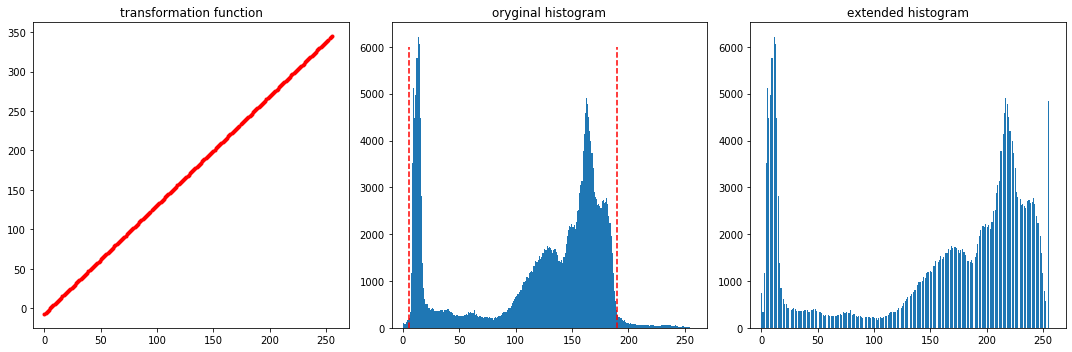

In [27]:
tit = ['transformation function','oryginal histogram','extended histogram']
f = plt.figure(figsize=(w,h))
for i,img in enumerate(['plot',arMan,ar2],1):
    plt.subplot(1,3,i)
    if i == 1:
        plt.plot(x,y,'.r')
    elif i ==2:
        plt.hist(img.ravel(),bins=256)
        plt.plot([5,5],[0,6000],'--r')
        plt.plot([190,190],[0,6000],'--r')
    else:
        plt.hist(img.ravel(),bins=256)
    plt.title(tit[i-1])
    plt.xlim(-10,270)
    plt.tight_layout()
del img

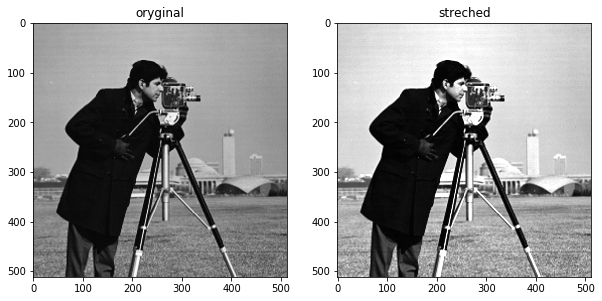

In [28]:
tit = ['oryginal','streched']
w,h = mySize([arMan,ar2])
f = plt.figure(figsize=(w,h))
for i,img in enumerate([arMan,ar2],1):
    plt.subplot(1,2,i)  # 2 images: one row, two columns
    plt.imshow(img)
    plt.title(tit[i-1])
del img

## Histogram equalization

 - calculate CDF (cumulative distributive function)
 - multiply the CDF value with gray levels (for 8 bits = 256-1 = 255)

[ 0.          0.99609375  1.9921875   2.98828125  3.984375    4.98046875
  5.9765625   6.97265625  7.96875     8.96484375  9.9609375  10.95703125
 11.953125   12.94921875 13.9453125  14.94140625 15.9375     16.93359375
 17.9296875  18.92578125 19.921875   20.91796875 21.9140625  22.91015625
 23.90625   ]
bins:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


freq:
[102, 76, 89, 114, 159, 209, 335, 1173, 3523, 5129, 4490, 4980, 5762, 6212, 6067, 4480, 2805, 1375, 860, 625, 498, 503, 426, 430, 379]

sum(freq): 262144


cdf:
[0.00038909912109375, 0.00067901611328125, 0.001018524169921875, 0.001453399658203125, 0.0020599365234375, 0.002857208251953125, 0.0041351318359375, 0.008609771728515625, 0.0220489501953125, 0.041614532470703125, 0.058742523193359375, 0.07773971557617188, 0.09972000122070312, 0.12341690063476562, 0.1465606689453125, 0.1636505126953125, 0.17435073852539062, 0.179595947265625, 0.1828765869140625, 0.18526077270507812, 0.1871604

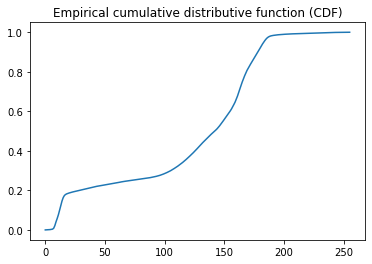

In [29]:
freq,bins = np.histogram(arMan.ravel(),bins=256)
print(bins[:25])
freq = freq.tolist()
bins = bins.tolist()
#print(f'{len(freq)},  {type(bins)}')
bins = [int(x) for x in bins][1:]
print(f'bins:\n{bins[:25]}\n\n')
print(f'freq:\n{freq[:25]}\n\nsum(freq): {sum(freq)}\n\n')
cdf = np.cumsum(freq)/sum(freq)
print(f'cdf:\n{cdf.tolist()[:25]}\n')

plt.plot(bins,cdf);
plt.title('Empirical cumulative distributive function (CDF)');

In [30]:
newVal = 255 * cdf
newVal = newVal.astype(np.uint8)
print(f'newVal:\n{newVal.tolist()[-25:]}\n')

newVal:
[254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255]



In [31]:
ar3 = np.zeros_like(arMan,dtype=np.uint8)

for i,val in enumerate(newVal):
    ar3[arMan==i] = val

for a in [arMan,ar3]:
    print(f'dtype: {a.dtype}, min: {a.min()}, max: {a.max()}')


dtype: uint8, min: 0, max: 255
dtype: uint8, min: 0, max: 255


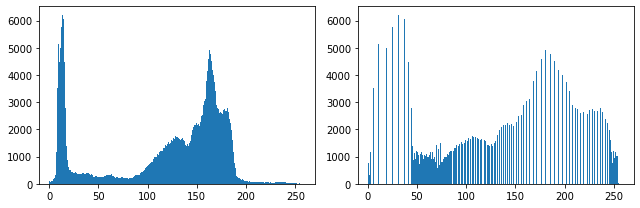

In [32]:
f = plt.figure(figsize=(9,3))

for i,img in enumerate([arMan,ar3],1):
    plt.subplot(1,2,i)
    plt.hist(img.ravel(),bins=256)
    #plt.title(tit[i-1])
    plt.xlim(-10,270)
plt.tight_layout()
del img

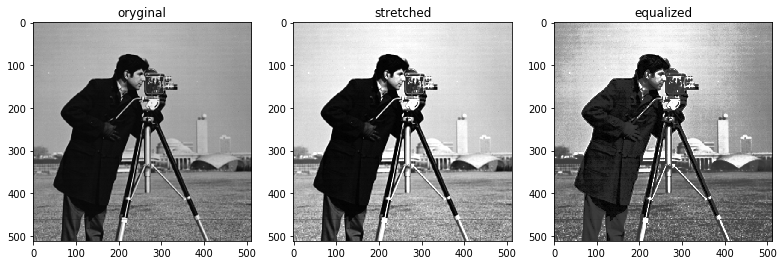

In [33]:
f = plt.figure(figsize=(11,4))
tit = ['oryginal','stretched','equalized']
for i,img in enumerate([arMan,ar2,ar3],1):
    plt.subplot(1,3,i)
    plt.imshow(img)
    plt.title(tit[i-1])
plt.tight_layout()
del img

### Simple functions

1. Histogram stretching
2. Histogram equalization function

In [34]:
def myStretch(ar,t):
    ''' Args:
            - ar:   numpy 2D array like image
            - t:    tuple (a, b), a: threshold on the left
                                  b: threshold on the right'''
    ar = ar.copy()
    
    # transformation coefficients: point 1: t, point 2: (245,255)
    a,b = np.polyfit(t,[0,255],1)
    print(f'Transformation coefficients:\n{"a:":>15} {a}, b: {b}\n')
    x = np.unique(ar.ravel())
    y = a*x + b

    new_ar = ar * a + b
    new_ar[ar<0] = 0
    new_ar[ar>255] = 255
    new_ar = np.array(new_ar,dtype=np.uint8)
    
    return new_ar

In [35]:
def myEqual(ar,c=0):
    ''' Args:
            - ar:   numpy 2D array like image'''
    ar = ar.copy()
    w,h = mySize([ar])
    new_ar = np.zeros_like(ar,dtype=np.uint8)
    freq,bins = np.histogram(arMan.ravel(),bins=256)
    freq = freq.tolist()
    bins = bins.tolist()
    
    # change bins to int value e.g 0-0.999 --> 0, 0.999-1.999 --> 1,... 
    bins = [int(x) for x in bins][1:]
    # calculate CDF
    cdf = np.cumsum(freq)/sum(freq)
    
    # if c is True (1) - plot CDF
    if c:
        plt.plot(bins,cdf);
        plt.title('Empirical cumulative distributive function (CDF)')
    
    # calculate new pixel value
    newVal = 255 * cdf
    newVal = newVal.astype(np.uint8)
    
    # set new pixel value with new array
    for i,val in enumerate(newVal):
        new_ar[ar==i] = val
    
    if c:
        tit = ['oryginal','after equalize']
        f = plt.figure(figsize=(w*2,h*0.8))
        for i,img in enumerate([ar,new_ar],1):
            plt.subplot(1,2,i)
            plt.hist(img.ravel(),bins=256)
            plt.title(tit[i-1])
            plt.xlim(-10,270)
        plt.tight_layout()
        del img
    return new_ar

### Check functions on Lena image

Transformation coefficients:
             a: 1.243902439024391, b: -24.87804878048782



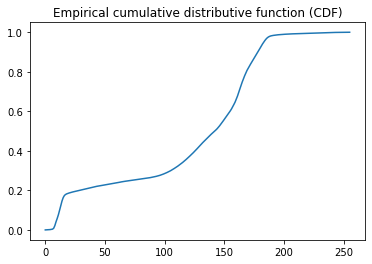

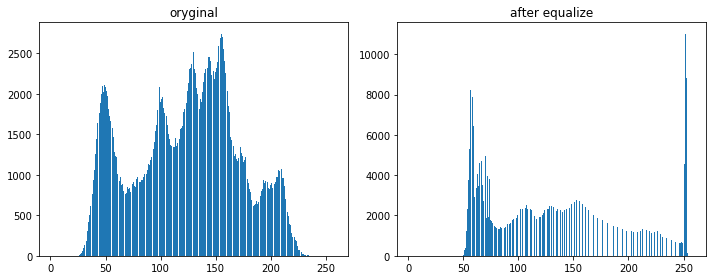

In [36]:
arLena_stretch = myStretch(arLena,(20,225))
arLena_equalize = myEqual(arLena,1)

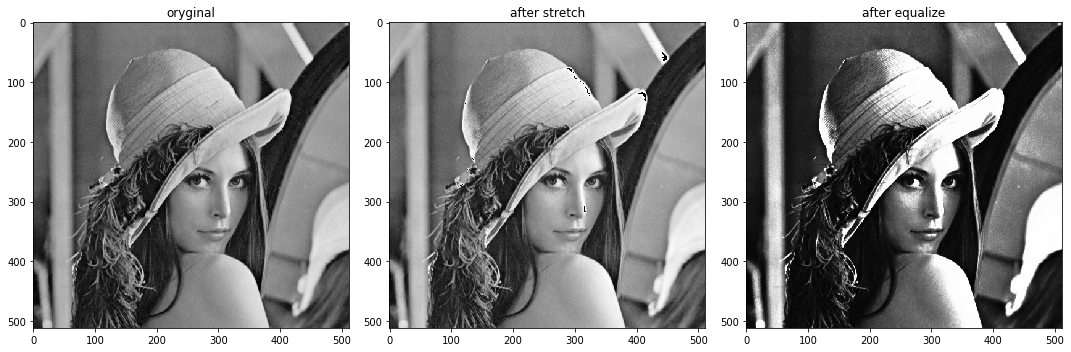

In [37]:
lena = [arLena,arLena_stretch,arLena_equalize]
w,h = mySize(lena)
tit = ['oryginal','after stretch','after equalize']
f = plt.figure(figsize=(w,h))
for i,img in enumerate(lena,1):
    plt.subplot(1,3,i)
    plt.imshow(img, aspect='auto')
    plt.title(tit[i-1])

plt.tight_layout()